In [1]:
#필요한 라이브러리 &데이터셋 다 가져오기
#seaborn, matplotlib, bokeh

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.resources import INLINE

import matplotlib as mpl ; mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt ; plt.rcParams['font.family'] = 'AppleGothic'

from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from  bokeh.palettes import Category20b

from bokeh.models.widgets import Panel, Tabs


In [2]:
output_notebook(INLINE)

Loading BokehJS ...

In [3]:
cd

/Users/dagunoh


In [4]:
cd Downloads

/Users/dagunoh/Downloads


In [5]:
pokemon = pd.read_csv('Pokemon.csv')

In [6]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
#legendary change
pokemon_l = []
for i in range(pokemon.shape[0]):
    if pokemon.Legendary[i] == False:
        pokemon_l.append(0)
    if pokemon.Legendary[i] ==True:
        pokemon_l.append(1)

        
pokemon['Legendary'] = pokemon_l

In [8]:
pokemon


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

In [9]:
pokemon = pokemon.fillna('missing')

In [10]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

<BarContainer object of 800 artists>

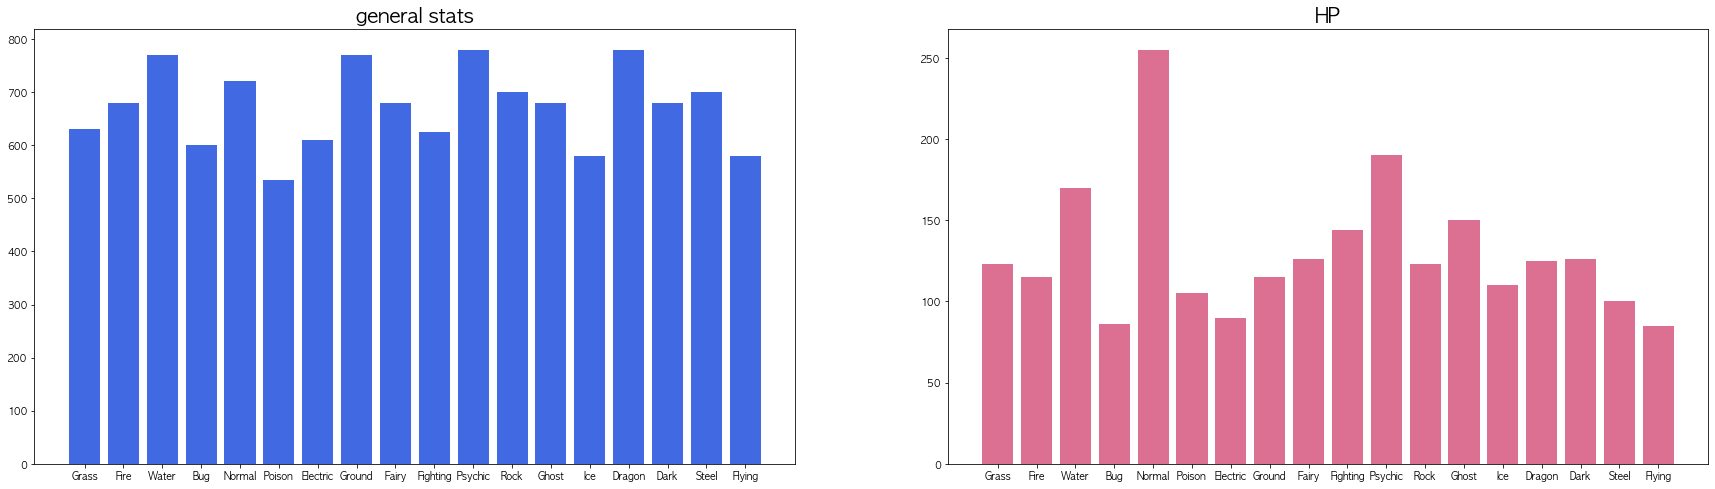

In [11]:
#matplotlib 이용 -> 어느 포켓몬 타입이 total과 hp가 가장 셀까?

fig, ax = plt.subplots(1,2,figsize=(30,8))

ax[0].set_title('general stats',fontsize=20)
ax[1].set_title('HP',fontsize=20)

ax[0].bar(pokemon['Type 1'], pokemon.Total, color='royalblue')
ax[1].bar(pokemon['Type 1'], pokemon.HP, color ='palevioletred')


#ax[0].set_xticklabels(pokemon['Type 1'],rotation =45)
#ax[1].set_xticklabels(pokemon['Type 1'],rotation =45)



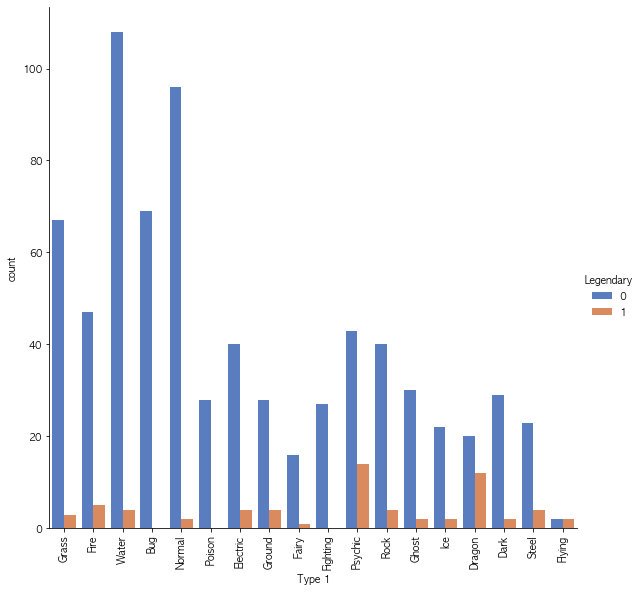

In [12]:

#fig, ax = plt.subplots(figsize=(15, 7))
a = sns.catplot(x = 'Type 1', data =pokemon, kind = 'count', hue='Legendary', palette='muted', height=8)
a.set_xticklabels(rotation =90)

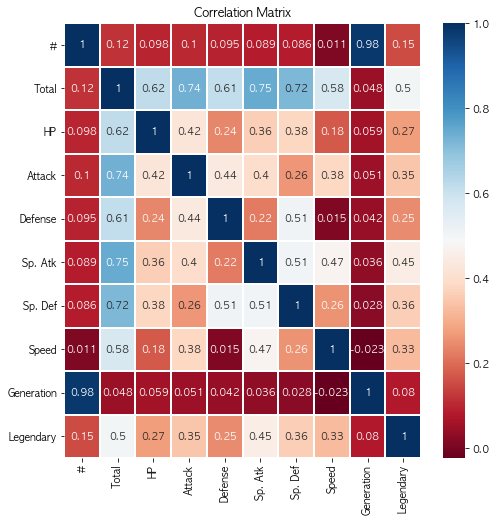

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
a = sns.heatmap(pokemon.corr(),annot = True, linewidths=1, cmap='RdBu')
ax.set_title('Correlation Matrix')
plt.show()



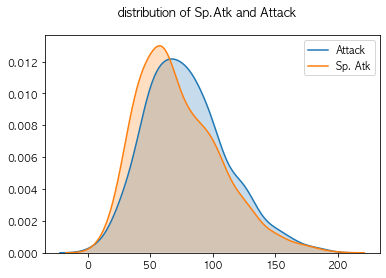

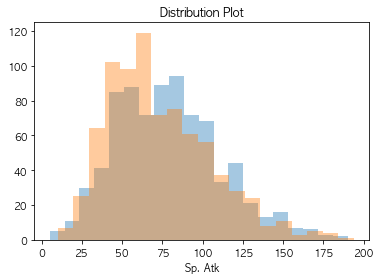

In [14]:
#전체 능력치와 공격력이 강한 선형관계를 가짐
#그렇다면 공격력의 분포를 보자 어디서부터가 공격력이 강한 포켓몬이라고 생각할 수 있을까?

fig, ax = plt.subplots()
fig.suptitle('distribution of Sp.Atk and Attack')
sns.kdeplot(data=pokemon['Attack'], shade=True, )
sns.kdeplot(data=pokemon['Sp. Atk'], shade=True)
plt.show()

fig, ax = plt.subplots()
sns.distplot(pokemon['Attack'], kde=False)
sns.distplot(pokemon['Sp. Atk'], kde=False)
ax.set_title('Distribution Plot')
plt.show()


In [15]:
pokemon['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [16]:
pokemon['Sp. Atk'].describe()

count    800.000000
mean      72.820000
std       32.722294
min       10.000000
25%       49.750000
50%       65.000000
75%       95.000000
max      194.000000
Name: Sp. Atk, dtype: float64

In [17]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [18]:
kind = list(pokemon['Type 1'].unique())
Grass= pokemon[pokemon['Type 1']== 'Grass']
Water = pokemon[pokemon['Type 1']=='Water']
Fire = pokemon[pokemon['Type 1'] =='Fire']
Bug = pokemon[pokemon['Type 1'] =='Bug']
Normal = pokemon[pokemon['Type 1'] =='Normal']
Poison= pokemon[pokemon['Type 1'] =='Poison']




In [19]:
alpha_lst = ['a','b','c','d','e','f',
             'g','h','i','j','k','l','m','n','o','p','q','r','s']
for i in range(18):
    alpha_lst[i] = pokemon[pokemon['Type 1']==kind[i]]


In [20]:
kind

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

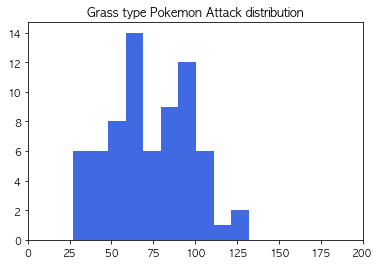

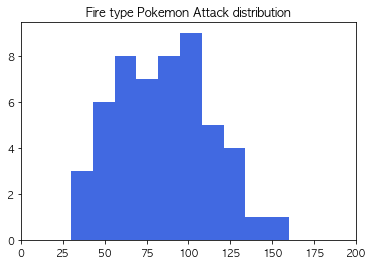

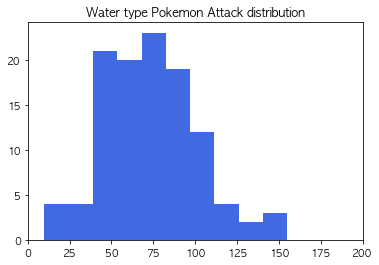

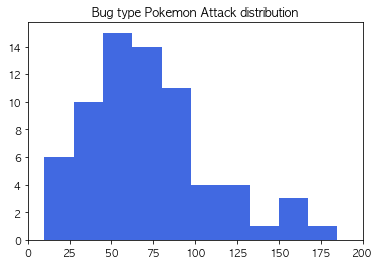

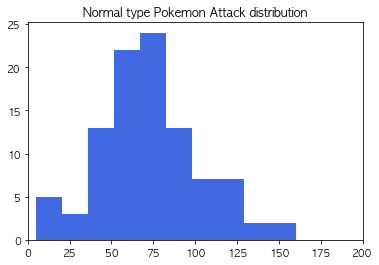

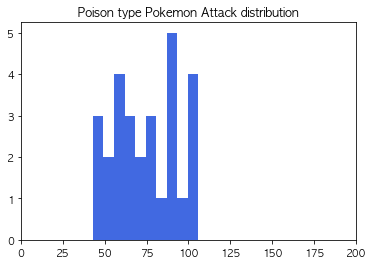

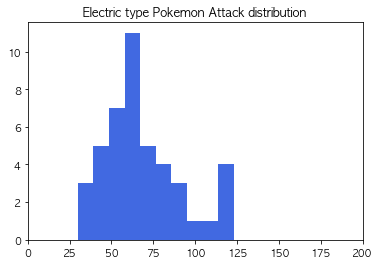

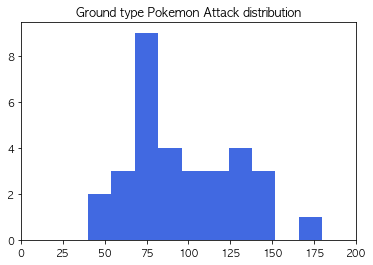

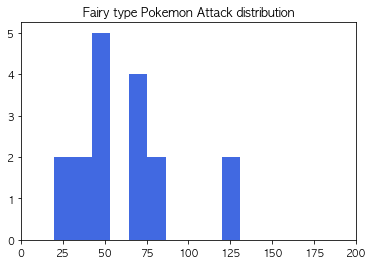

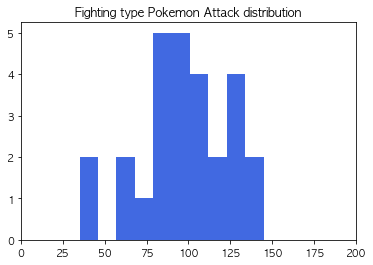

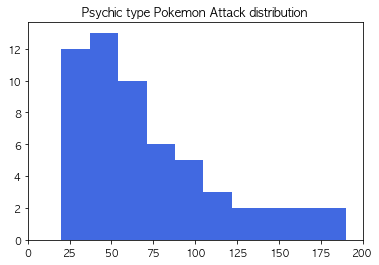

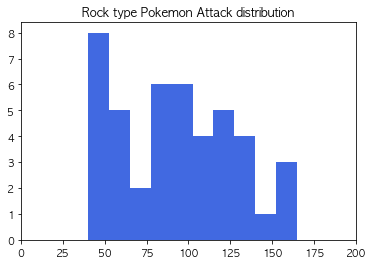

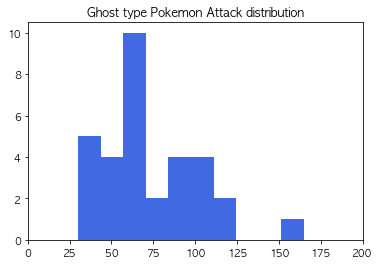

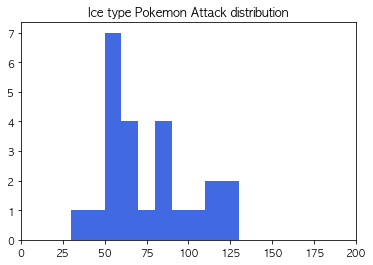

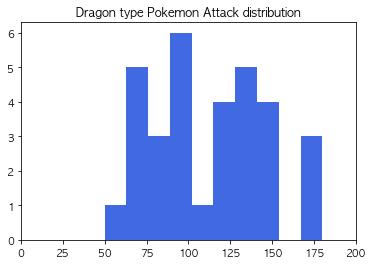

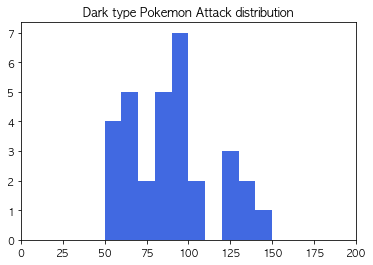

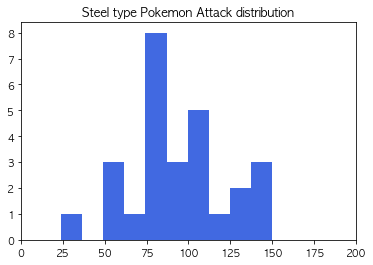

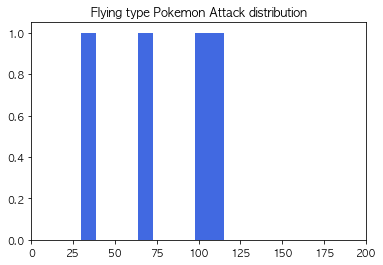

In [26]:
for i in range(len(kind)):
    fig, ax = plt.subplots()
    ax.set_xlim([0, 200])
    ax.hist((alpha_lst[i])['Attack'], color='royalblue', )
    ax.set_title(str(kind[i] + ' type Pokemon Attack distribution'))
    plt.show()

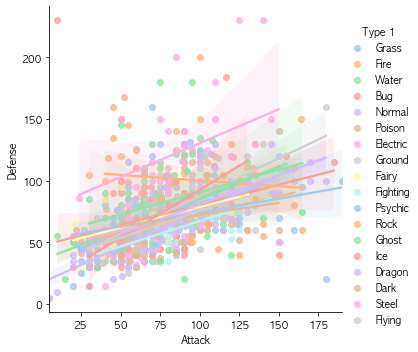

In [22]:
sns.lmplot(x='Attack', y='Defense', data=pokemon, hue='Type 1', palette='pastel', )
plt.show()

In [23]:
from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from  bokeh.palettes import Category20b

source = pokemon

hover = HoverTool(tooltips=[('Name', '@Name'),('Attack', '@Attack'), ('Defense', '@Defense'),
                            ('HP', '@HP')])
mapper = CategoricalColorMapper(factors=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], palette=['#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39', '#e7ba52',
                                                      '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6'])

plot = figure(plot_width=800, plot_height=800, tools=[hover],
              x_axis_label='Attack', y_axis_label='Defense', title='Attack and Defense')
plot.circle('Attack', 'Defense', source=source, size=5, color={'field':'Type 1','transform':mapper}, legend_field='Type 1')
plot.legend.location = 'top_left'
show(plot)


In [24]:
kind = list(pokemon['Type 1'].unique())
#for i in range(len(kind)):
#    kind[i]= pokemon[pokemon['Type 1']== kind[i]]
#    i+=1
    


In [25]:
from bokeh.models.widgets import Panel, Tabs


hover = HoverTool(tooltips=[('Name', '@Name'),('Attack', '@Attack'), ('Defense', '@Defense'),
                            ('HP', '@HP')])

p1 = figure(plot_width=400, plot_height=400, x_axis_label='Attack', y_axis_label='Defense',
           title='Water type pokemon',tools=[hover])
p1.circle('Attack', 'Defense', source=Water, color='blue')

p2 = figure(plot_width=400, plot_height=400, x_axis_label='Attack', y_axis_label='Defense',
           title='Fire type pokemon',tools=[hover])
p2.circle('Attack', 'Defense', source=Fire, color='red')

p3 = figure(plot_width=400, plot_height=400, x_axis_label='Attack', y_axis_label='Defense',
           title='Grass type pokemon',tools=[hover])
p3.circle('Attack', 'Defense', source=Grass, color='green')


tab1 = Panel(child=p1, title='Water')
tab2 = Panel(child=p2, title='Fire')
tab3 = Panel(child=p3, title='Grass')

tabs = Tabs(tabs=[tab1, tab2, tab3])
show(tabs)